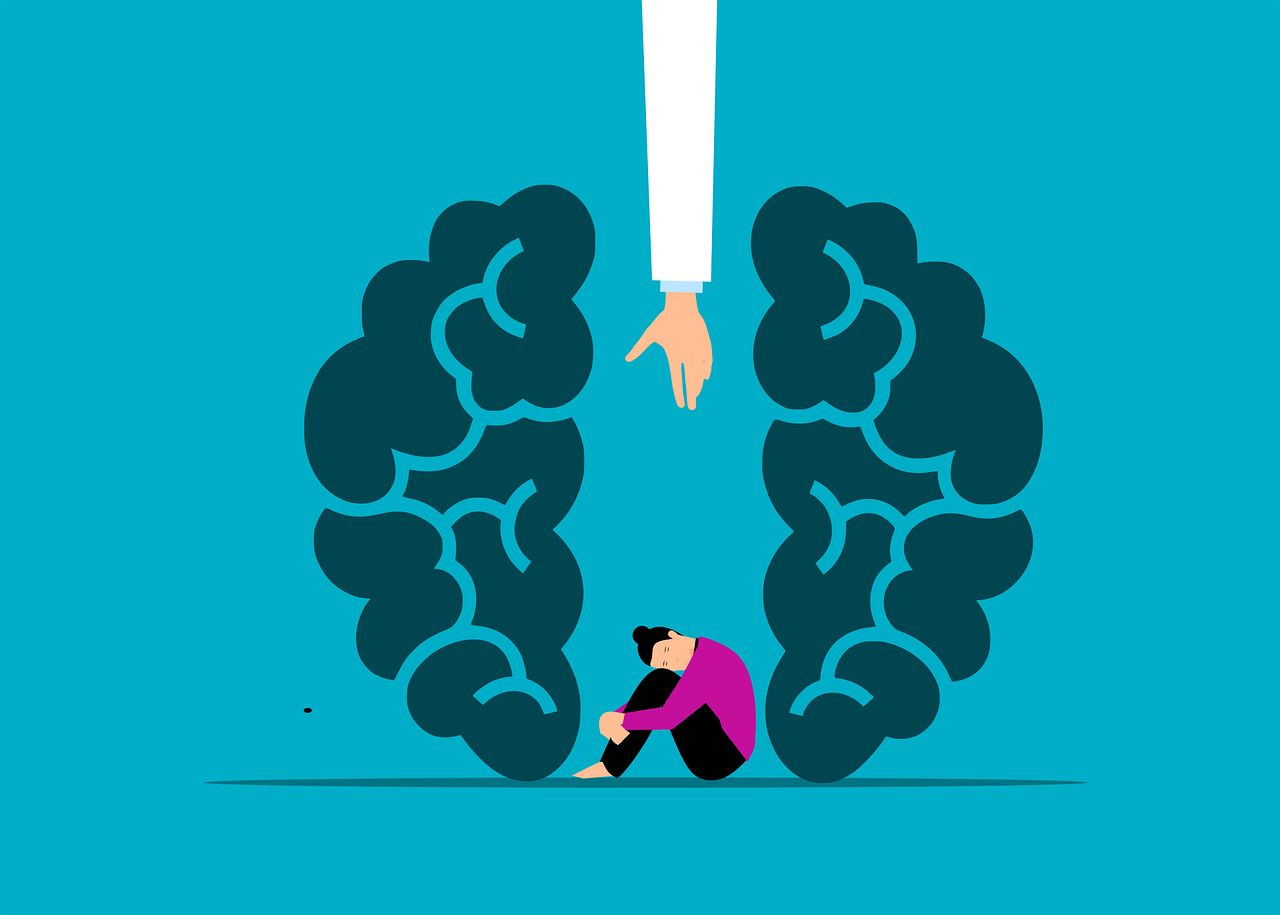

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("mentalhealth.xlsx")
df.shape

(1259, 27)

In [3]:
pd.set_option('display.max_columns', None)
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1259.0,7.942815e+07,2.818299e+09,-1726.0,27.0,31.0,36.0,1.000000e+11


In [6]:
df.isna().sum().sort_values(ascending =False)

comments                     1095
state                         515
work_interfere                264
self_employed                  18
seek_help                       0
obs_consequence                 0
mental_vs_physical              0
phys_health_interview           0
mental_health_interview         0
supervisor                      0
coworkers                       0
phys_health_consequence         0
mental_health_consequence       0
leave                           0
anonymity                       0
Timestamp                       0
wellness_program                0
Age                             0
benefits                        0
tech_company                    0
remote_work                     0
no_employees                    0
treatment                       0
family_history                  0
Country                         0
Gender                          0
care_options                    0
dtype: int64

In [7]:
null_frame = pd.DataFrame()
null_frame

""


In [8]:
null_frame.index = df.columns
null_frame

""
Timestamp
Age
Gender
Country
state
self_employed
family_history
treatment
work_interfere
no_employees


In [9]:
null_frame['Null Frequency'] = df.isna().sum().values
null_frame

,Null Frequency
Timestamp,0
Age,0
Gender,0
Country,0
state,515
self_employed,18
family_history,0
treatment,0
work_interfere,264
no_employees,0


In [10]:
percent = df.isna().sum()/df.shape[0]
percent

Timestamp                    0.000000
Age                          0.000000
Gender                       0.000000
Country                      0.000000
state                        0.409055
self_employed                0.014297
family_history               0.000000
treatment                    0.000000
work_interfere               0.209690
no_employees                 0.000000
remote_work                  0.000000
tech_company                 0.000000
benefits                     0.000000
care_options                 0.000000
wellness_program             0.000000
seek_help                    0.000000
anonymity                    0.000000
leave                        0.000000
mental_health_consequence    0.000000
phys_health_consequence      0.000000
coworkers                    0.000000
supervisor                   0.000000
mental_health_interview      0.000000
phys_health_interview        0.000000
mental_vs_physical           0.000000
obs_consequence              0.000000
comments    

In [11]:
null_frame['Missing percentage'] = np.round(percent, decimals= 4)*100
null_frame


,Null Frequency,Missing percentage
Timestamp,0,0.00
Age,0,0.00
Gender,0,0.00
Country,0,0.00
state,515,40.91
self_employed,18,1.43
family_history,0,0.00
treatment,0,0.00
work_interfere,264,20.97
no_employees,0,0.00


In [12]:
null_frame.transpose()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
Null Frequency,0.0,0.0,0.0,0.0,515.00,18.00,0.0,0.0,264.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1095.00
Missing percentage,0.0,0.0,0.0,0.0,40.91,1.43,0.0,0.0,20.97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86.97


In [13]:
df.self_employed.value_counts()

No     1095
Yes     146
Name: self_employed, dtype: int64

In [14]:
df.work_interfere.value_counts()

Sometimes    465
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64

In [15]:
df.work_interfere.unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

In [16]:
df.work_interfere.mode()

0    Sometimes
Name: work_interfere, dtype: object

In [17]:
df.work_interfere.mode()[0]

'Sometimes'

In [18]:
df['self_employed'] = df['self_employed'].fillna( df.self_employed.mode()[0])
df['work_interfere'] = df['work_interfere'].fillna( df.work_interfere.mode()[0])

In [19]:
df.isna().sum().sort_values(ascending = False)

comments                     1095
state                         515
wellness_program                0
obs_consequence                 0
mental_vs_physical              0
phys_health_interview           0
mental_health_interview         0
supervisor                      0
coworkers                       0
phys_health_consequence         0
mental_health_consequence       0
leave                           0
anonymity                       0
seek_help                       0
Timestamp                       0
Age                             0
benefits                        0
tech_company                    0
remote_work                     0
no_employees                    0
work_interfere                  0
treatment                       0
family_history                  0
self_employed                   0
Country                         0
Gender                          0
care_options                    0
dtype: int64

In [20]:
df.drop(['comments'], axis=1, inplace= True)
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,2014-08-27 11:29:31,37,Female,United States,IL,No,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,2014-08-27 11:29:37,44,M,United States,IN,No,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,2014-08-27 11:29:44,32,Male,Canada,NaN,No,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,No,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,2014-08-27 11:30:22,31,Male,United States,TX,No,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [21]:
df.isna().sum().sort_values(ascending = False)

state                        515
Timestamp                      0
wellness_program               0
mental_vs_physical             0
phys_health_interview          0
mental_health_interview        0
supervisor                     0
coworkers                      0
phys_health_consequence        0
mental_health_consequence      0
leave                          0
anonymity                      0
seek_help                      0
care_options                   0
Age                            0
benefits                       0
tech_company                   0
remote_work                    0
no_employees                   0
work_interfere                 0
treatment                      0
family_history                 0
self_employed                  0
Country                        0
Gender                         0
obs_consequence                0
dtype: int64

In [22]:
null_frame = pd.DataFrame()
null_frame

""


In [23]:
null_frame.index = df.columns
null_frame

""
Timestamp
Age
Gender
Country
state
self_employed
family_history
treatment
work_interfere
no_employees


In [24]:
null_frame['Null Frequency'] = df.isna().sum().values
null_frame

,Null Frequency
Timestamp,0
Age,0
Gender,0
Country,0
state,515
self_employed,0
family_history,0
treatment,0
work_interfere,0
no_employees,0


In [25]:
percent = df.isna().sum()/df.shape[0]
percent

Timestamp                    0.000000
Age                          0.000000
Gender                       0.000000
Country                      0.000000
state                        0.409055
self_employed                0.000000
family_history               0.000000
treatment                    0.000000
work_interfere               0.000000
no_employees                 0.000000
remote_work                  0.000000
tech_company                 0.000000
benefits                     0.000000
care_options                 0.000000
wellness_program             0.000000
seek_help                    0.000000
anonymity                    0.000000
leave                        0.000000
mental_health_consequence    0.000000
phys_health_consequence      0.000000
coworkers                    0.000000
supervisor                   0.000000
mental_health_interview      0.000000
phys_health_interview        0.000000
mental_vs_physical           0.000000
obs_consequence              0.000000
dtype: float

In [26]:
null_frame['Missing percentage'] = np.round(percent, decimals= 4)*100
null_frame


,Null Frequency,Missing percentage
Timestamp,0,0.00
Age,0,0.00
Gender,0,0.00
Country,0,0.00
state,515,40.91
self_employed,0,0.00
family_history,0,0.00
treatment,0,0.00
work_interfere,0,0.00
no_employees,0,0.00


In [27]:
null_frame.transpose()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
Null Frequency,0.0,0.0,0.0,0.0,515.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Missing percentage,0.0,0.0,0.0,0.0,40.91,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
df.duplicated().sum()

0

In [29]:
df.duplicated().any()

False

#Handling of inconsistent data

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1259 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             1259 non-null   object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [31]:
df.Timestamp.unique()

array(['2014-08-27 11:29:31', '2014-08-27 11:29:37',
       '2014-08-27 11:29:44', ..., '2015-11-07 12:36:58',
       '2015-11-30 21:25:06', '2016-02-01 23:04:31'], dtype=object)

In [32]:
len(df.Timestamp.unique())

1246

In [33]:
df['Timestamp'] = pd.to_datetime(df['Timestamp']) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Timestamp                  1259 non-null   datetime64[ns]
 1   Age                        1259 non-null   int64         
 2   Gender                     1259 non-null   object        
 3   Country                    1259 non-null   object        
 4   state                      744 non-null    object        
 5   self_employed              1259 non-null   object        
 6   family_history             1259 non-null   object        
 7   treatment                  1259 non-null   object        
 8   work_interfere             1259 non-null   object        
 9   no_employees               1259 non-null   object        
 10  remote_work                1259 non-null   object        
 11  tech_company               1259 non-null   object        
 12  benefi

In [34]:
df.Gender.unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [35]:
len(df.Gender.unique())

49

In [36]:
df.Gender.value_counts()

Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Female                                              2
Trans woman                                         1
msle                                                1
male leaning androgynous                            1
Neuter                      

In [37]:
len(df.Gender.str.lower().unique())

43

In [38]:
len(df.Gender.unique())

49

In [39]:
#Remove the undecesive
stk_list = ['A little about you','p']
df = df[~df['Gender'].isin(stk_list)]

#strstas of Gender Category
male_str = ['male', 'm','male-ish','maile','mal','male(cis)','make','male','man','msle','mail','malr','cis man','Cis Male','cis male']


female_str =['cis female','f','female','woman','femake','female','cis female/femme','female(cis)','femail']

trans_str = ['Trans-female','something kinda male?','queer/she/they','non-binary','Nah','All','enby','fluid','Genderqueer',
             'Androgyne','Agender','male leaning androgynous','Guy (-ish) ^_^','Trans woman','Neuter','female(trans)','queer',
            'ostensibly male, unsure what that really means']

In [40]:
#Performing Operation
df['Gender'] = df['Gender'].apply(lambda x: 'male' if x in male_str else('female' if x in female_str else 'trans'))


#Display the Unique value of Gender feeature
print(df['Gender'].unique())

['trans' 'male' 'female']


In [41]:
df.Gender.value_counts()

trans     933
male      245
female     79
Name: Gender, dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1257 entries, 0 to 1258
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Timestamp                  1257 non-null   datetime64[ns]
 1   Age                        1257 non-null   int64         
 2   Gender                     1257 non-null   object        
 3   Country                    1257 non-null   object        
 4   state                      742 non-null    object        
 5   self_employed              1257 non-null   object        
 6   family_history             1257 non-null   object        
 7   treatment                  1257 non-null   object        
 8   work_interfere             1257 non-null   object        
 9   no_employees               1257 non-null   object        
 10  remote_work                1257 non-null   object        
 11  tech_company               1257 non-null   object        
 12  benefi

In [43]:
cat_features = []
for c in df.columns:
    if df[c].dtype == 'object':
        cat_features.append(c)

In [44]:
print(cat_features)

['Gender', 'Country', 'state', 'self_employed', 'family_history', 'treatment', 'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence']


In [45]:
df[cat_features]

,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,trans,United States,IL,No,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,trans,United States,IN,No,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,trans,Canada,NaN,No,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,trans,United Kingdom,NaN,No,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,trans,United States,TX,No,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,male,United Kingdom,NaN,No,No,Yes,Sometimes,26-100,No,Yes,No,No,No,No,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,trans,United States,IL,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,Yes,No,No,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,female,United States,NC,No,No,No,Sometimes,100-500,Yes,Yes,No,Yes,No,No,Don't know,Don't know,Yes,No,No,No,No,No,No,No


In [46]:
import plotly.graph_objs as go

fig = go.Figure()

fig.add_bar(x= df[cat_features[0]], y =df[cat_features[0]].index )

button [dict(method = 'restyle',
              args = [{'x': [df[cat_features[k]], 'undefined'], 
                       'y': [df[cat_features [k]].index, 'undefined'],
                       'visible':[True, False]}],
              label = cat_features[k])   for k in range(0, len(cat_features))]

#Updating the layout of the graph

fig.update_layout(title_text-Frequency Distribution of Feature Values',title_x-0.4,
                  width=1000,height=450,
                  updatemenus = [dict(active=0, 
                                      buttons=button,
                                      x=1.15,y=1,
                                      xanchor ='left',
                                      yanchor ='top')])

#Adding extra annotaions alongside the button
 fig.add_annotation(x=1.03,
                    y=0.97,
                    xref='paper',
                    yref='paper',
                    showarrow=False,
                    xanchor='left,
                    yanchor= 'top',
                    text='Feature')

#Display the graph
fig.show()

In [47]:
df.Age.describe()

count    1.257000e+03
mean     7.955453e+07
std      2.820541e+09
min     -1.726000e+03
25%      2.700000e+01
50%      3.100000e+01
75%      3.600000e+01
max      1.000000e+11
Name: Age, dtype: float64

In [48]:
df['Age'][df['Age']>75]= 75
df['Age'][df['Age']<14]= 14

In [49]:
df.Age.describe()

count    1257.000000
mean       32.087510
std         7.539196
min        14.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        75.000000
Name: Age, dtype: float64

# Exploratory Data Anlysis

In [50]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,2014-08-27 11:29:31,37,trans,United States,IL,No,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,2014-08-27 11:29:37,44,trans,United States,IN,No,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,2014-08-27 11:29:44,32,trans,Canada,NaN,No,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,2014-08-27 11:29:46,31,trans,United Kingdom,NaN,No,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,2014-08-27 11:30:22,31,trans,United States,TX,No,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


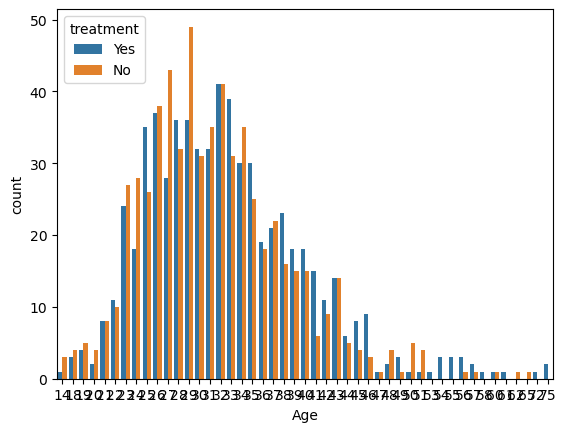

In [51]:
#How does age relate to vearious behaviours and/or their 
# awareness of their employer's attitude towards mental health.?

plt.Figure(figsize=(20,50))
sns.countplot(x ='Age', hue = 'treatment', data = df)
plt.show()

#What is the density distribution of age feature?


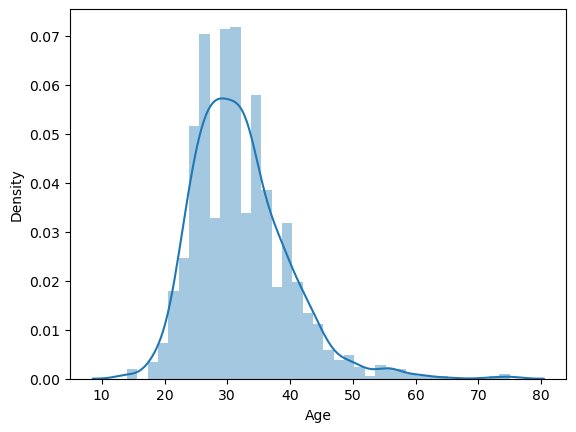

In [52]:

sns.distplot(df['Age'])
plt.show()

#what is the association b/w treatment and gender in terms of ratio?

In [53]:
df.Gender.unique()

array(['trans', 'male', 'female'], dtype=object)

In [54]:
df.Gender.value_counts()

trans     933
male      245
female     79
Name: Gender, dtype: int64

In [55]:
df['treatment'].value_counts()

Yes    635
No     622
Name: treatment, dtype: int64

In [56]:
df['treatment'][df['Gender']=='trans'].value_counts()

Yes    469
No     464
Name: treatment, dtype: int64

In [57]:
df['treatment'][df['Gender']=='male'].value_counts()

No     135
Yes    110
Name: treatment, dtype: int64

In [58]:
df['treatment'][df['Gender']=='female'].value_counts()

Yes    56
No     23
Name: treatment, dtype: int64

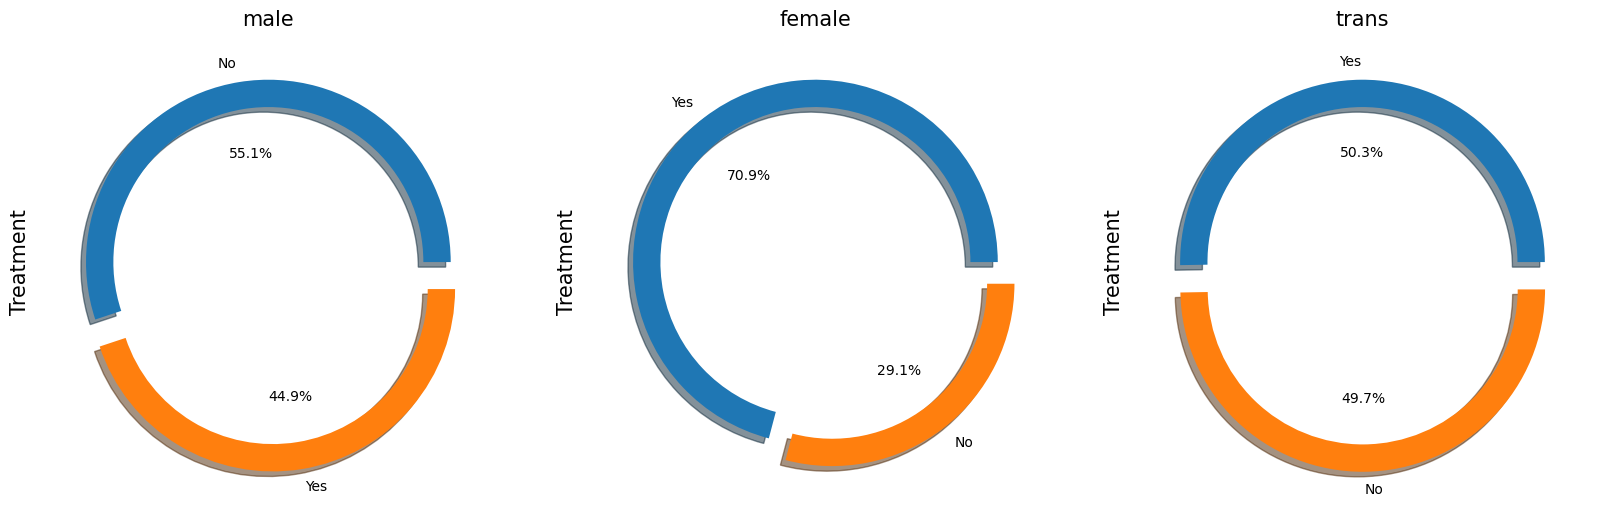

In [59]:
figure, ax = plt.subplots(nrows =1, ncols = 3, figsize=(20,8))

gender = ['male','female','trans']
custom_index = [0,1,2]

for i,j in zip (gender, custom_index):
    df['treatment'][df['Gender']==i].value_counts()\
        .plot\
            .pie(autopct='%1.1f%%',ax = ax[j],
                explode = [0,0.15],
                shadow = True,
                wedgeprops =dict(width = 0.15))
    
    ax[j].set_title(i,fontsize=15)
    ax[j].set_ylabel(ylabel='Treatment',fontsize=15)
    
plt.show()

what is the association b/w treament and work interference in terms of ratio.?

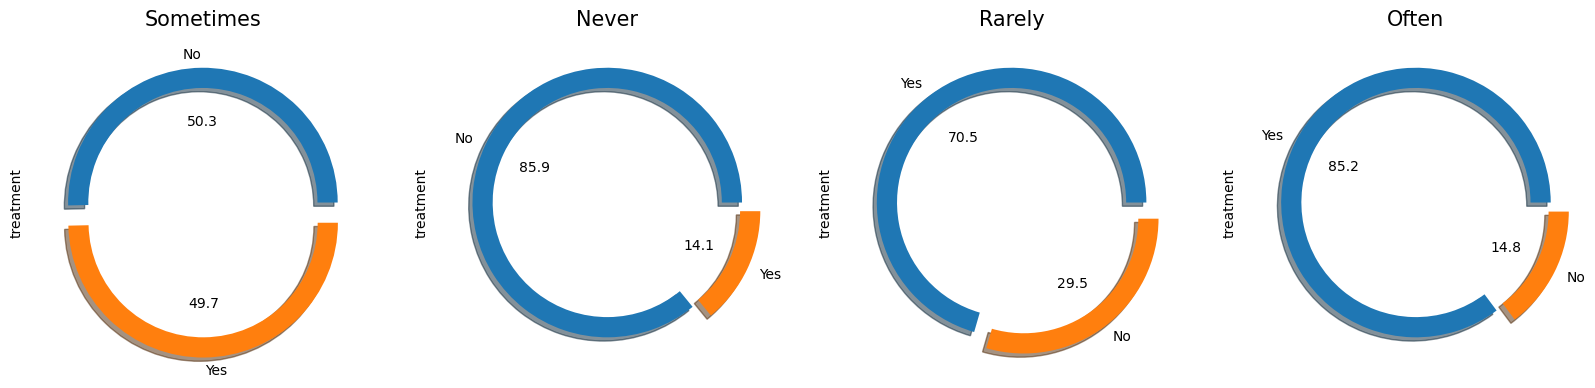

In [60]:
f, ax = plt.subplots(nrows=1,ncols=4,figsize=(20,8))

work = ['Sometimes','Never','Rarely','Often']
custom_index = [0,1,2,3]

for i,j in zip(work,custom_index):
    df['treatment'][df['work_interfere']==i].value_counts()\
    .plot\
    .pie(autopct='%1.1f',ax=ax[j],explode=[0,0.15],shadow=True,
        wedgeprops = dict(width=0.15))
    ax[j].set_title(i, fontsize=15)
plt.show()

What is the association b/w the treatment and age..?


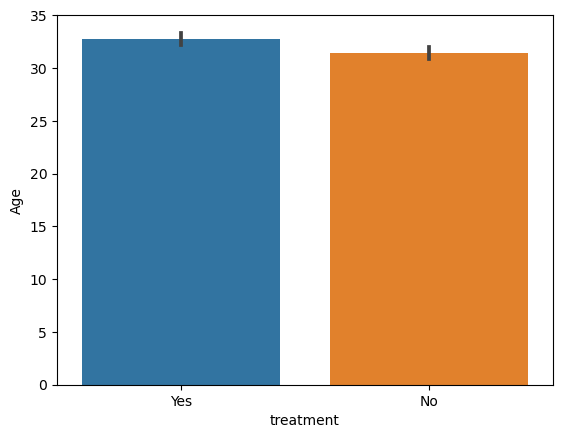

In [61]:
sns.barplot(x = 'treatment', y ='Age', data=df)
plt.show()

What is the association b/w the treatment and family history of the employee..?

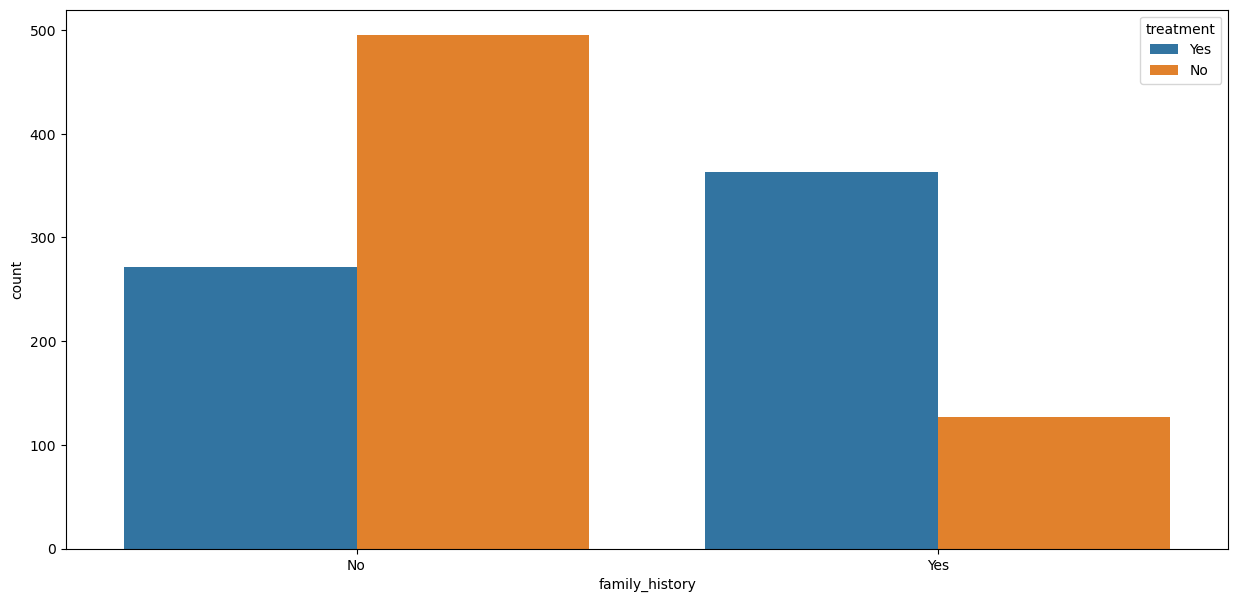

In [62]:
plt.figure(figsize = (15,7))
sns.countplot(x = 'family_history', hue ='treatment', data=df)
plt.show()

What is the association b/w the treatment and employee count in the company..?

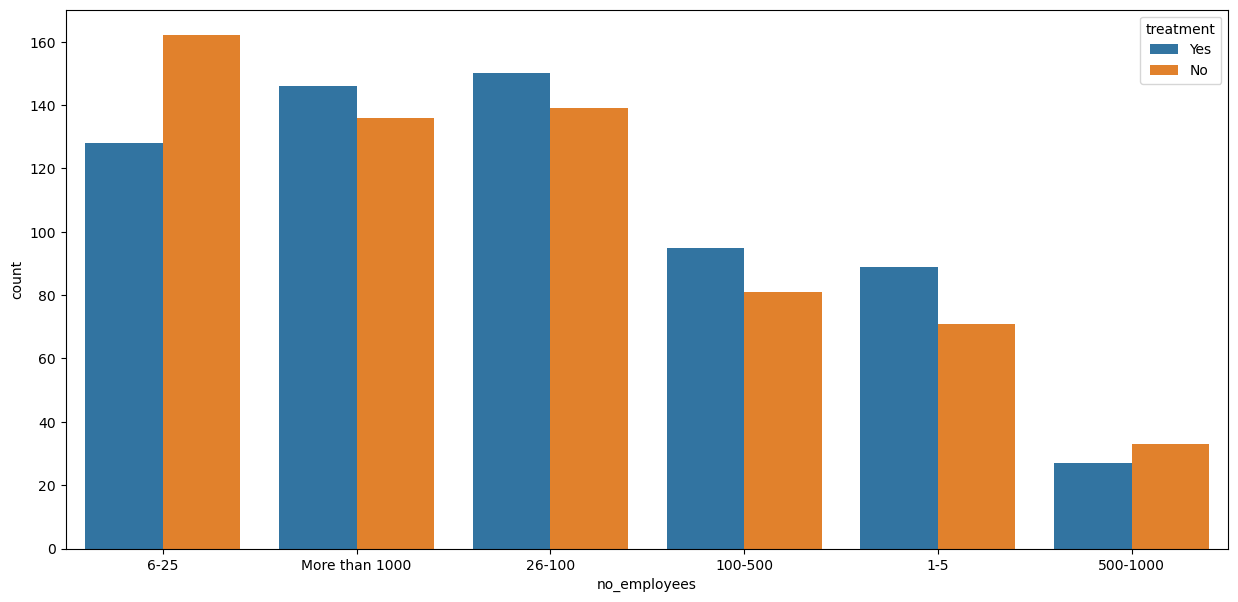

In [63]:
plt.figure(figsize = (15,7))
sns.countplot(x = 'no_employees', hue ='treatment', data=df)
plt.show()

In [64]:
df.groupby(by=['treatment','Gender']).agg('count')[['no_employees']].unstack()

no_employees           
Gender          female male trans
treatment                        
No                  23  135   464
Yes                 56  110   469

what is the correlation b/w the attributes of the employee in the dataset.?

In [65]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [66]:
Attr_cols = ['self_employed',
       'family_history', 'treatment',
       'remote_work', 'tech_company',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']

In [67]:
Attr_cols

['self_employed',
 'family_history',
 'treatment',
 'remote_work',
 'tech_company',
 'wellness_program',
 'seek_help',
 'anonymity',
 'leave',
 'mental_health_consequence',
 'phys_health_consequence',
 'coworkers',
 'supervisor',
 'mental_health_interview',
 'phys_health_interview',
 'mental_vs_physical',
 'obs_consequence']

In [68]:
df[Attr_cols].head()

,self_employed,family_history,treatment,remote_work,tech_company,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,No,No,Yes,No,Yes,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,No,No,No,No,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,No,No,No,No,Yes,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,No,Yes,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,No,No,No,Yes,Yes,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [69]:
from sklearn.preprocessing import LabelEncoder

In [70]:
df[Attr_cols].apply(LabelEncoder().fit_transform)

,self_employed,family_history,treatment,remote_work,tech_company,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,0,0,1,0,1,1,2,2,2,1,1,1,2,1,0,2,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0
2,0,0,0,0,1,1,1,0,1,1,1,2,2,2,2,1,0
3,0,1,1,0,1,1,1,1,1,2,2,1,0,0,0,1,1
4,0,0,0,1,1,0,0,0,0,1,1,1,2,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,0,0,1,0,1,1,1,0,2,1,1,1,1,1,1,0,0
1255,0,1,1,1,1,1,1,2,1,1,1,1,2,1,1,2,0
1256,0,1,1,0,1,1,1,0,1,2,2,0,0,1,1,1,0
1257,0,0,0,1,1,1,1,0,0,2,1,0,0,1,1,1,0


In [71]:
from ydata_profiling import ProfileReport

In [72]:
profile = ProfileReport(
    df, title="Mental Health")

In [73]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [74]:
profile

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]